In [29]:
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt

In [30]:
y, sr = librosa.load(".\\babble_16k.wav")

In [31]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

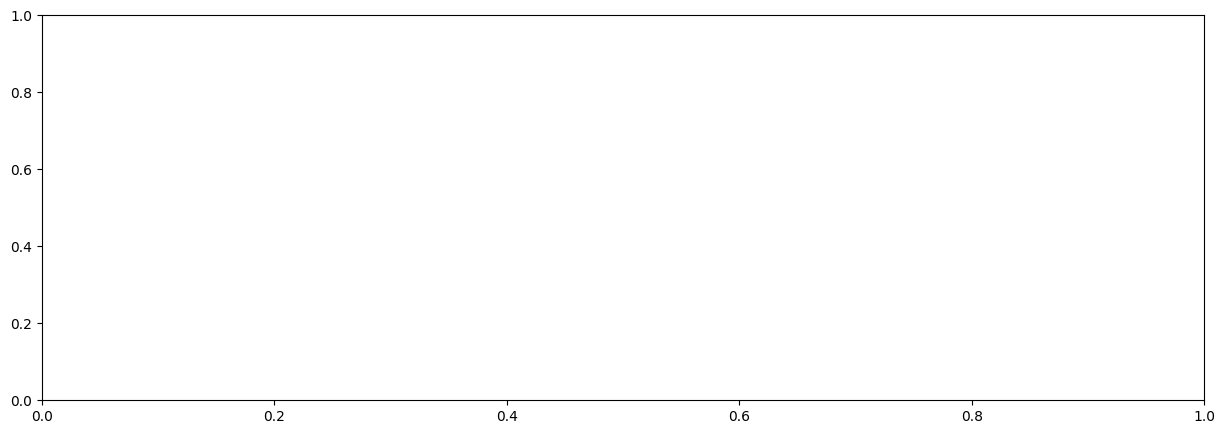

In [32]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(y, sr=sr) 
plt.xlabel('time (s)') 
plt.ylabel('amplitude')
plt.title('noise signal')
plt.show()

In [56]:
import os
data_directory = ".\\intro-disclaimers"
durations = []

def process_directory(directory):
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        
        elif item.endswith('.flac'):
            cl, sr_cl = librosa.load(item_path, sr=None)
            duration = librosa.get_duration(y=cl, sr=sr_cl)
            durations.append(duration)


process_directory(data_directory)
average_duration = sum(durations) / len(durations)
print(f"Durée moyenne des audios: {average_duration:.2f} secondes")


Durée moyenne des audios: 11.28 secondes


In [58]:

import soundfile as sf
noise_directory =".\\noise"
segment_length = int(sr * 11.28)  

for start in range(0, len(y), segment_length):
    end = start + segment_length
    segment = y[start:end]
    output_path = os.path.join(noise_directory, f'segment_{start//segment_length}.wav')

    sf.write(output_path, segment, sr)


In [72]:


from random import choice as rand_choice

noise_audio_directory =".\\noisy_audio"
def process_directory(directory):
    audio_data = []  

    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):
            audio_data.extend(process_directory(item_path))
        elif item.endswith('.flac'):
           voice, sr_voice = librosa.load(item_path, sr=None)  
           audio_data.append((voice, sr_voice))

    return audio_data

audio_data = process_directory(data_directory)


for voice, sr_voice in audio_data:
    if len(voice) <= segment_length:
        noise_files = [f for f in os.listdir(noise_directory) if f.endswith('.wav')]
        random_noise_file = rand_choice(noise_files) 
        noise_segment_path = os.path.join(noise_directory, random_noise_file)
        noise, sr_noise = librosa.load(noise_segment_path, sr=None)

        if sr_noise != sr_voice:
           print(f"Sample rate mismatch: Noise segment has {sr_noise} Hz, but voice data has {sr_voice} Hz.")
           
           
 
           noise = librosa.resample(noise, orig_sr=sr_noise, target_sr=sr_voice)
    
           sr_noise = sr_voice

        noisy_voice = voice + noise[:len(voice)]

        
        output_path = os.path.join(noise_directory, f'noisy_audio.flac')

        sf.write(output_path, noisy_voice, sr_voice)


Sample rate mismatch: Noise segment has 22050 Hz, but voice data has 16000 Hz.


ValueError: operands could not be broadcast together with shapes (189440,) (180480,) 